      id  value XY    LR
0      0    251  x  left
1      0    194  y  left
2      1    253  x  left
3      1    207  y  left
4      2    255  x  left
...   ..    ... ..   ...
2715  65    240  y  left
2716  66    297  x  left
2717  66    240  y  left
2718  67    293  x  left
2719  67    240  y  left

[2720 rows x 4 columns]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.0% of the points

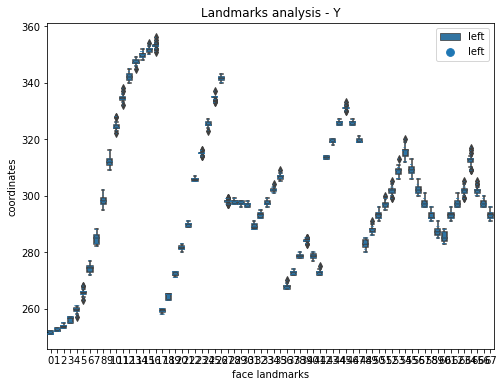

In [97]:
import json
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

left_dict_list = []

with open("test.json", "r") as f:
    lines = f.readlines()
    lcount = 0
    for line in lines:
        left_data = json.loads(line)
        lcount += 1
        left_dict_list.append(left_data)

# print(left_dict_list)

landmark_info = []

for i in range(0,lcount):
    for j in range(0, 68):
        landmark_info.append([j, left_dict_list[i][str(j)][0], 'x', 'left'])
        landmark_info.append([j, left_dict_list[i][str(j)][1], 'y', 'left'])

landmark_df = pd.DataFrame(landmark_info, columns=['id', 'value', 'XY', 'LR'])
print(landmark_df)
landmark_df_x = landmark_df.loc[landmark_df["XY"] == "x"]
landmark_df_y = landmark_df.loc[landmark_df["XY"] == "y"]

plt.figure(figsize=(8,6))
sns.boxplot(x="id", y="value", hue="LR", data=landmark_df_x)

plt.xlabel('face landmarks')
plt.ylabel('coordinates')

plt.title('Landmarks analysis - Y')
plt.legend(loc='upper right')
plt.show()



In [99]:
import json
import pandas as pd

# test.json 파일 로드 및 dataFrame 변환
test = pd.read_csv("test.json")
print(type(test))

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

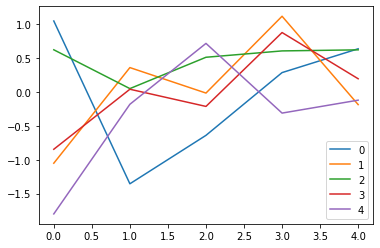

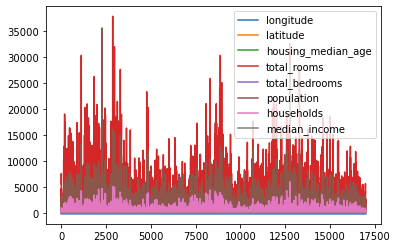

In [100]:
import pandas as pd

#1. 파일 읽고 쓰기
df = pd.read_csv('california_housing_train.csv')
type(df)
df #전체 내용 출력

#2. 처음 몇줄만 선택 출력
df.head(2)

#3. 월하는 컬럼만 선택 해서 출력하고 싶다.
df['longitude'].head(5)

#4. 파일을 저장하다
df.to_csv("california_res.csv")

#5. 데이터 행과 열을 확인
df.shape

#6. 통계 산출
df.mean()
df.sum()
df.count()
df.var()
df.describe() #자주 사용하는 집계 메소드를 표시해준다

#상관계수 : 입력변수로 입출력사이에 관계값을 표시
df.corr()

#7. 정렬 : sort_values()
sort_df = df.sort_values(by='total_rooms')  #by값을 반드시 줘야함 기준!
#by 지정한 컬럼을 기준으로 오름차순 정렬을 해서 df객체를 생성한 다음 리턴
sort_df.head()
type(sort_df)   #pandas.core.frame.DataFrame / help(pandas.core.frame.DataFrame)도 해봐

#내림 차순으로 해보자
sort_df02 = df.sort_values(by='total_rooms', ascending=False)
sort_df02

#데이터 선택
#median_house_value 를 기준으로 각각의 열을 분리해서 각 변수에 저장 후 사용
#부분선택 df.iloc[]
df.head(5)
df.iloc[0,0]   #0,0의 데이터 출력

t = df.iloc[:,-1]
t.head()
type(t)   # -> pandas.core.series.Series : 한줄 또는 하나의 열을 추출한 객체

x = df.iloc[:, 0:-1]   #행은 모두, 마지막 열 빼는거임 0부터 : -1해서 
#하나이상의 행 또는 열은 DataFrame으로 리턴함 type(x)
x.head()


df['result']=None
df.head()

res = df['median_house_value'] > 70000
res  #조건 구문에 True, False -> mask (res)
res.head()
df[res].head()  #조건에 맞는 : res 의 head

#논리 연산, 논리합 | , 논리곱 & 가능
mask02 = (df['median_house_value'] < 70000) | (df['median_house_value'] > 80000)
mask02
df[mask02].head()

mask03 = (df['median_house_value'] > 70000) & (df['median_house_value'] < 80000)
mask03
df[mask03].head()

df[ (df['median_house_value'] > 70000) & (df['median_house_value'] < 80000) ].head()


#조건 지정으로 값을 추출할 수 있다.
#컬럼 추가를 해서 median_house_value를 이용해서 60000보다 작으면 0, 
#60000~70000 이면 1 , 70000~80000 이면 2, 80000 이상은 3

#조건에 따른 mask를 지정한다.
res01 = df['median_house_value'] < 60000
res02 =  (df['median_house_value'] >= 60000) & (df['median_house_value'] < 70000)
res03 =  (df['median_house_value'] >= 70000) & (df['median_house_value'] < 80000)
res04 =  df['median_house_value'] >= 80000

#행과 열을 정수 인덱스로 지정 df.iloc[] / 열 이름을 지정하는 경우 df.loc[] 사용
df.loc[res01,'result']=0
df.loc[res02,'result']=1
df.loc[res03,'result']=2
df.loc[res04,'result']=3
df.head(10)

#결손치 값
df.iloc[0,0]=None #결손값을 명시 대입 후 Nan으로 대입된 것을 확인

df_drop = df.dropna()
df
df_drop
df
mean = df.mean()  #평균값 계산   -119.562417  / 35.625225
df_fillna = df.fillna(mean) #mean를 df.fillna() 메소드로 전달해서 결측값을 보안
df_fillna.head()

#상호 보안
type(df.values)
df.values  #수치(값)만 뽑아서 배열로 관리 -> numpy.ndarray

type(df['longitude'])   #pandas.core.series.Series
type(df['longitude'].values)   #numpy.ndarray

import numpy as np
#ndarray -> pd.DataFrame
df= pd.DataFrame(data = np.random.randn(5,5))
df
df.plot()  #그래프 연동
x.plot()